# Calculation of intrinsic and total efficiencies for circular side of the detector

## Geometrical efficiency calculated from the previous part

[0.14306685213211046, 0.15536067356419309, 0.16955048044736235, 0.1859422869767222, 0.20479960306593734, 0.22620855520399288, 0.249805559623631, 0.2743181666248312, 0.2970263846618793, 0.31369482489870104, 0.3199072066943097, 0.31369482489870115, 0.2970263846618794, 0.27431816662483127, 0.24980555962363113, 0.226208555203993, 0.2047996030659374, 0.18594228697672227, 0.1695504804473624, 0.15536067356419317, 0.1430668521321105]
0.14306685213211046
0.15536067356419309
0.16955048044736235
0.1859422869767222
0.20479960306593734
0.22620855520399288
0.249805559623631
0.2743181666248312
0.2970263846618793
0.31369482489870104
0.3199072066943097
0.31369482489870115
0.2970263846618794
0.27431816662483127
0.24980555962363113
0.226208555203993
0.2047996030659374
0.18594228697672227
0.1695504804473624
0.15536067356419317
0.1430668521321105
0.14306685213211046
0.15536067356419309
0.16955048044736235
0.1859422869767222
0.20479960306593734
0.22620855520399288
0.249805559623631
0.2743181666248312
0.2970

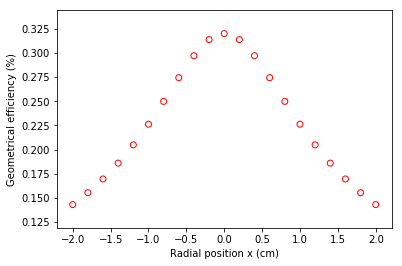

In [10]:
import math
import numpy
from matplotlib import pyplot as plt
import pandas as pd
R=2.54
t=0.05
y=1
z=0
x_positions=[]
geo_eff_cir=[]
for i in numpy.arange(-2, 2.2, 0.2): 
    x_positions.append(i)
    geo_eff=0.5*(1-math.cos(numpy.arctan((R+t)/y)))*(y/math.sqrt(i*i + y*y + z*z))
    geo_eff_cir.append(geo_eff) 
print(geo_eff_cir)



with open("cir_geo_twoin.csv", "w") as out_file:
     for number in geo_eff_cir:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_geo_twoin.csv",names=['Calculation'])
data.to_csv("cir_geo_twoinupdated.csv")


for number in geo_eff_cir:
    print(number)

plt.scatter(x_positions,geo_eff_cir, color="none", edgecolor="red", label="Experimental")
plt.xlabel('Radial position x (cm)')
plt.ylabel('Geometrical efficiency (%)')
plt.savefig("cirtwo_geo.pdf",bbox_inches='tight')
plt.show()

## Calculation of the survival probability of photon inside the cover layer (similar to the cylindrical side)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.4654159148625232
0.4502213236155486
0.437372426112706
0.42664537672626013
0.4178231668043687
0.41070758390289264
0.4051259929924086
0.4009349487758769
0.39802200232402635
0.3963065344112017
0.3957400976898542
0.39630653441120156
0.39802200232402635
0.4009349487758765
0.4051259929924086
0.41070758390289225
0.41782316680436876
0.42664537672626024
0.43737242611270605
0.4502213236155479
0.46541591486252326


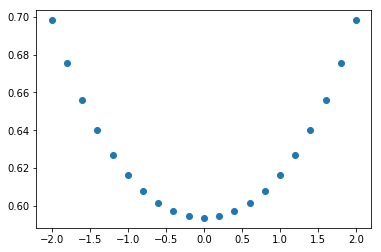

In [11]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=2.54
t=0.05
h=5.1
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-2, 2.2, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)
integral_survive=[x*1.5 for x in integral_survive]

plt.plot(y_positions,integral_survive, 'o')
plt.show()

## Calculation of interaction probability of the photon with crystal 

In [12]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-2, 2.2, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


345.87127712215175
318.46876623957644
293.7352125155504
271.75562074314104
252.60011973339638
236.32273588324244
222.96303917975962
212.54880245115032
205.09866402407997
200.6243397576368
199.13222308696646
200.62433975763665
205.09866402407997
212.54880245115007
222.96303917975968
236.322735883242
252.60011973339613
271.75562074314104
293.7352125155504
318.46876623957644
345.8712771221518


## Calculation of the intrinsic detection efficiency of the detecor for the circular side of that

-----------------------------
Thease are the products
241.46099529971332
215.0721441998893
192.70752379898636
173.9149187841541
158.31327294325555
145.5893098138919
135.49218397245812
127.8273648346889
122.45067139327058
119.26310521182675
118.20690812645091
119.26310521182663
122.45067139327058
127.82736483468862
135.49218397245815
145.58930981389148
158.31327294325544
173.91491878415417
192.70752379898636
215.07214419988892
241.4609952997134
THIS IS COEFFICIENT1
[0.482885, 0.5337810000000001, 0.602176, 0.629336, 0.658145, 0.692677, 0.7606, 0.8217, 0.8957, 0.9669]
These are the elements of products: 
116.59789271530207
114.80142420316112
116.04384585117842
109.45091932794442
104.19308902123892
100.8463663539572
103.05535512945166
105.03574568466387
109.67906636695247
115.31549642931529
118.20690812645091
115.31549642931516
109.67906636695247
105.03574568466364
103.05535512945167
100.84636635395691
104.19308902123885
109.45091932794445
116.04384585117842
114.80142420316092
116.59789271

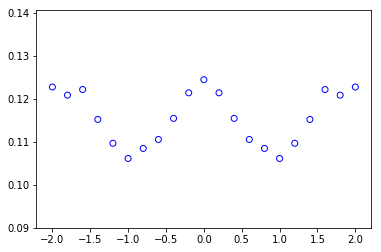

In [13]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   


First_sublist=products[0:10]
Second_sublist=products[11:21]

Coefficient1=[0.5681*0.85, 0.59309*0.9, 0.6208*0.97, 0.6488*0.97, 0.6785*0.97, 0.7141*0.97, 0.7606, 0.8217, 0.8957, 0.9669]
Coefficient1 = [x * 1 for x in Coefficient1]
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)


print("THIS IS COEFFICIENT1")
print(Coefficient1)


for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*1 for i in products[10:11]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)
    



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 


intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(i/950)
    
with open("cir_intr_twoin.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_intr_twoin.csv",names=['Calculation'])
data.to_csv("cir_intr_twoinupdated.csv")

    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
#plt.xlim(-1.9,1.9)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("cirtwo_intr.pdf", bbox_inches='tight')
plt.show()

## Calculation of the absolute detection efficiency of the detector for the circular side of the detector

0.017559256290542946
0.0187743437792966
0.020710831386344164
0.021422688685834433
0.022461792919751162
0.02401295876894865
0.0270987375371839
0.030329698090830547
0.034292185848490746
0.03807776259000089
0.03980551767442507
0.03807776259000086
0.03429218584849076
0.030329698090830488
0.027098737537183917
0.024012958768948593
0.022461792919751155
0.021422688685834447
0.02071083138634417
0.018774343779296578
0.01755925629054296


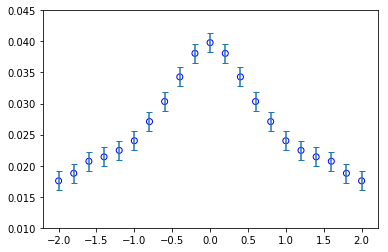

In [14]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geo_eff_cir,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 

with open("cir_total_twoin.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_total_twoin.csv",names=['Calculation'])
data.to_csv("cir_total_twoinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.ylim(0.01,0.045)
plt.savefig("cirtwo_total.pdf", bbox_inches='tight')
plt.show()